In [13]:
import gym

In [2]:
environment = gym.make('CartPole-v0') 
environment.reset() 

array([ 0.04477203, -0.01212458, -0.00679659,  0.03393529])

In [3]:
for dummy in range(100):
    environment.render() 
    environment.step(environment.action_space.sample())

/Users/jaimealmeida/Repos/rl_projects/rl_projects/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


https://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb

In [1]:
# The typical imports
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
#     plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))


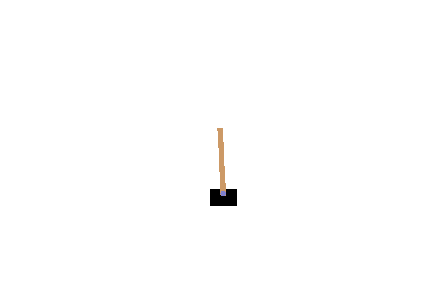
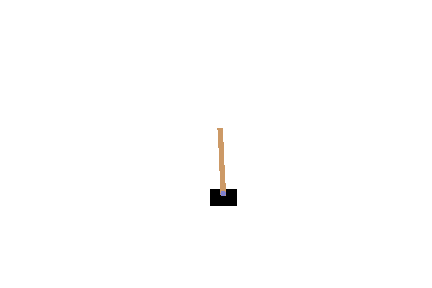
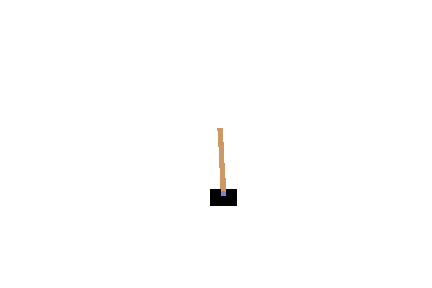
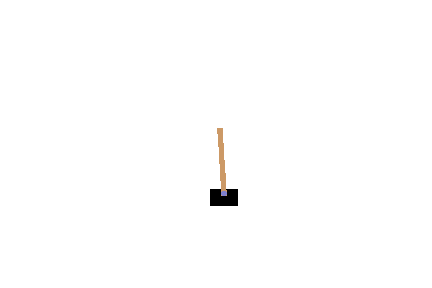
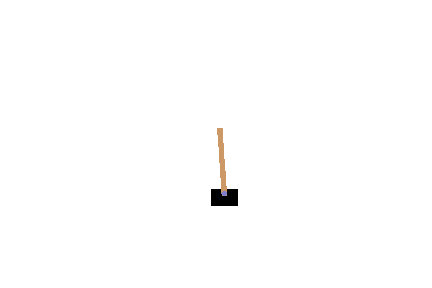
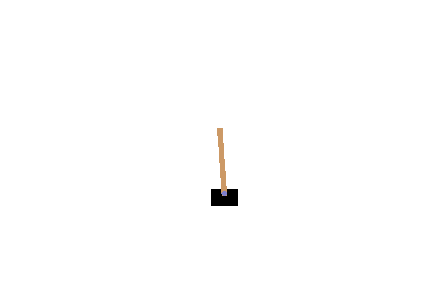
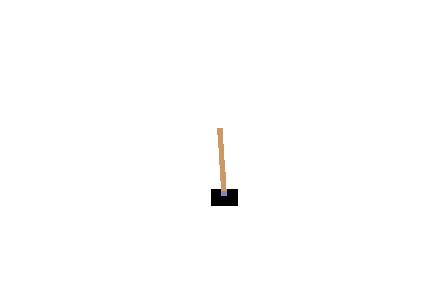
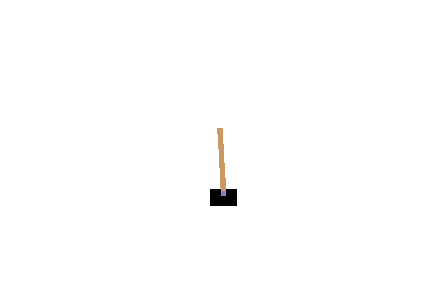
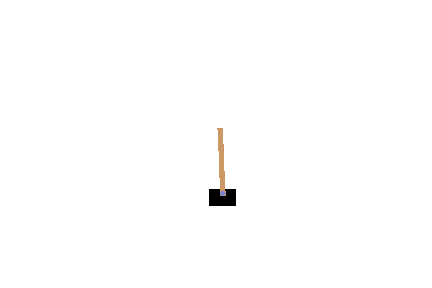
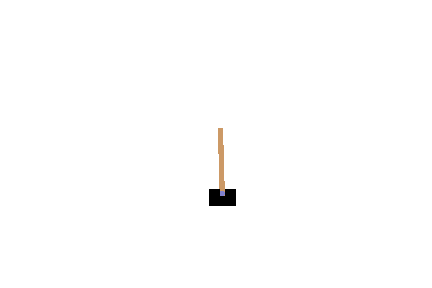
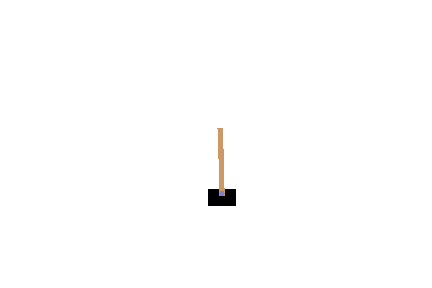
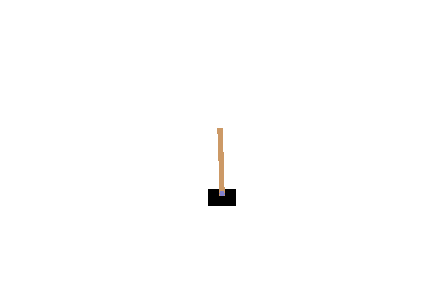
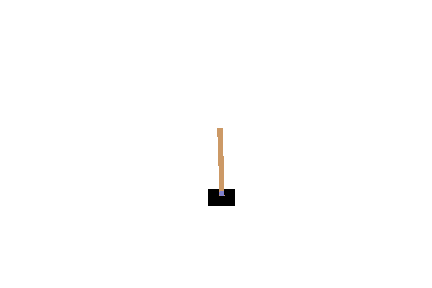
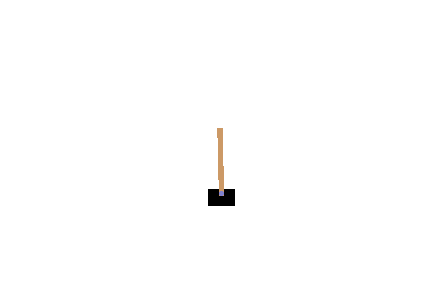
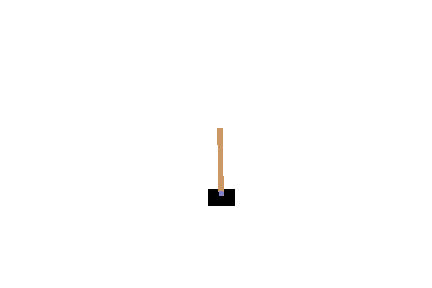
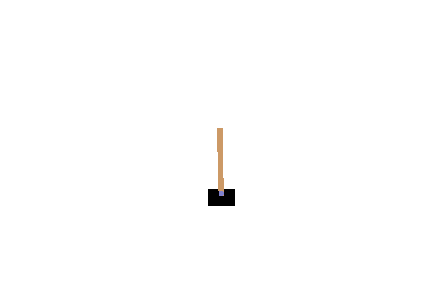
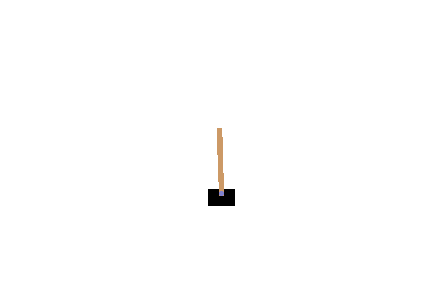
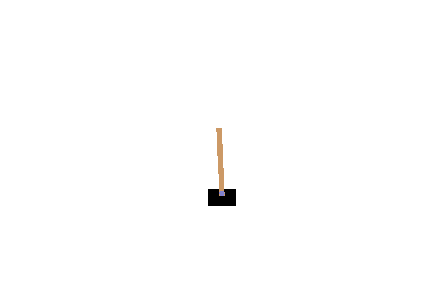
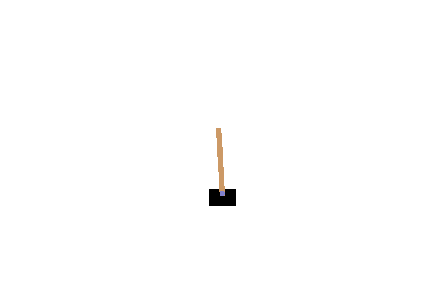
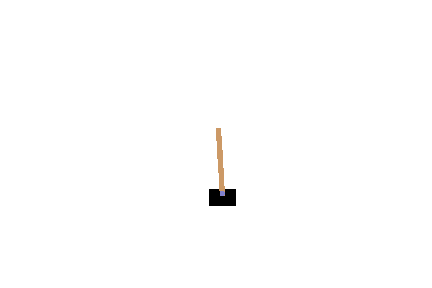
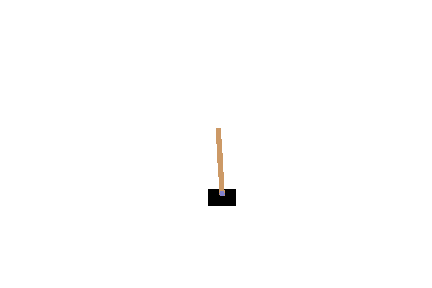
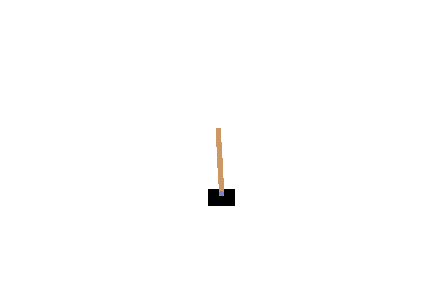
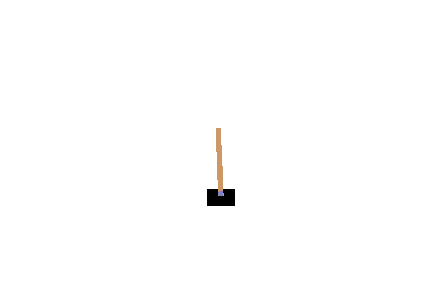
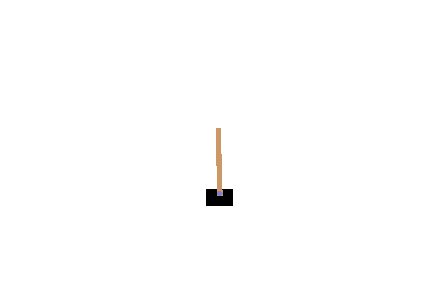
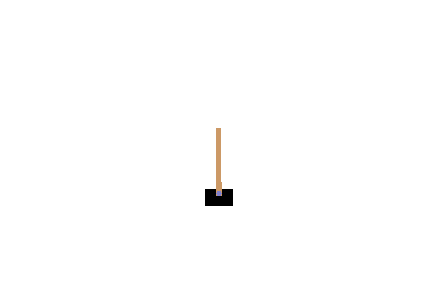
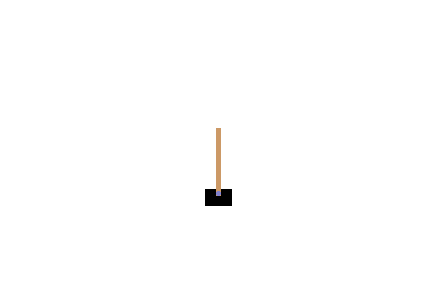
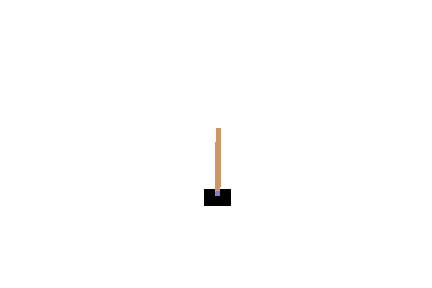
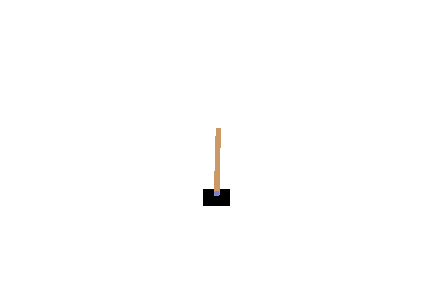
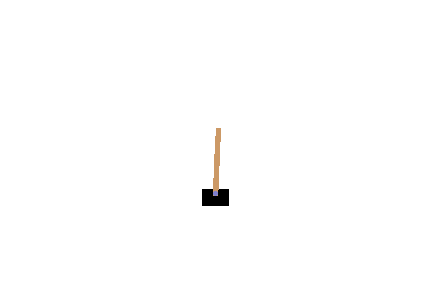
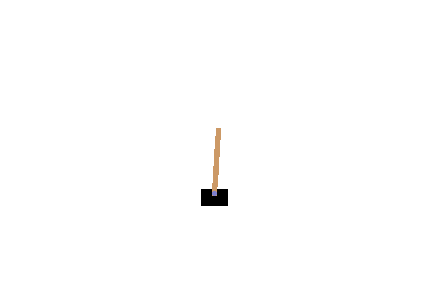
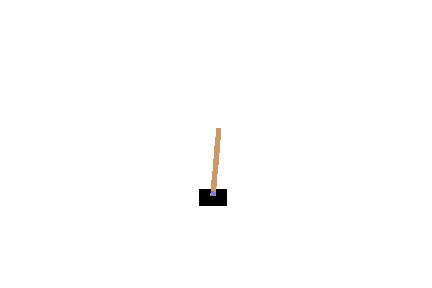
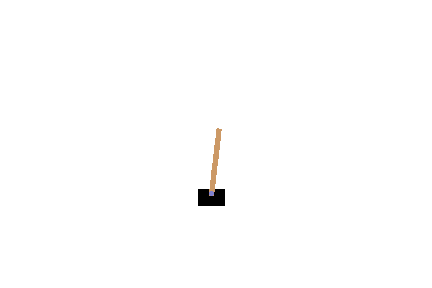
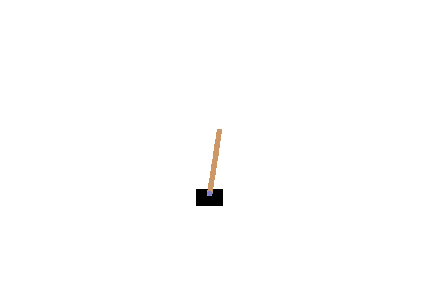
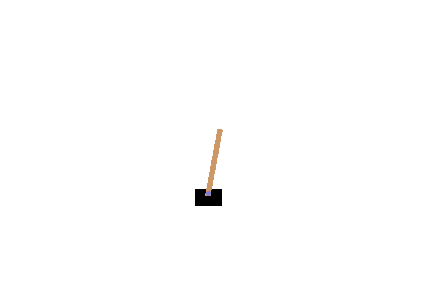

In [9]:
env = gym.make('CartPole-v0')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(100000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()
display_frames_as_gif(frames)

In [6]:
import math
import numpy as np
import random
import gym

In [7]:
environment = gym.make('CartPole-v0')

In [8]:
no_buckets = (1, 1, 6, 3)
no_actions = environment.action_space.n

In [9]:
# Next, define the state_value_bounds, as follows:

In [10]:
state_value_bounds = list(zip(environment.observation_space.low, environment.observation_space.high))
state_value_bounds[1] = [-0.5, 0.5]
state_value_bounds[3] = [-math.radians(50), math.radians(50)]

In [11]:
# Next, define the action_index, as follows:

In [12]:
action_index = len(no_buckets)

In [13]:
# Next define the q_value_table, as follows:

In [14]:
q_value_table = np.zeros(no_buckets + (no_actions,))

In [15]:
# q_value_table

In [16]:
# Next, define the minimum exploration rate and the minimum learning rate:

In [17]:
min_explore_rate = 0.01
min_learning_rate = 0.1

In [18]:
# Next, define the maximum episodes, the maximum time steps, the streak to the end, the solving time, the discount, and the number of streaks, as constants:

In [19]:
max_episodes = 10 #00
max_time_steps = 10#250
streak_to_end = 120
solved_time = 199
discount = 0.99
no_streaks = 0

In [20]:
# Next, define the select action that can decide the action, as follows:

In [21]:
def select_action(state_value, explore_rate):
    if random.random() < explore_rate:
        action = environment.action_space.sample()
    else:
        action = np.argmax(q_value_table[state_value])
    return action

In [22]:
# Next, select the explorestate, as follows:

In [23]:
def select_explore_rate(x):
    return max(min_explore_rate, min(1, 1.0 - math.log10((x+1)/25)))


In [24]:
# Next, select the learning rate, as follows:

In [25]:
def select_learning_rate(x):
    return max(min_learning_rate, min(0.5, 1.0 - math.log10((x+1)/25)))

In [26]:
# Next, bucketizethe state_value, as follows:

In [27]:
def bucketize_state_value(state_value):
    bucket_indexes = []
    for i in range(len(state_value)):
        if state_value[i] <= state_value_bounds[i][0]:
            bucket_index = 0
        elif state_value[i] >= state_value_bounds[i][1]:
            bucket_index = no_buckets[i] - 1
        else:
            bound_width = state_value_bounds[i][1] - state_value_bounds[i][0]
            offset = (no_buckets[i]-1)*state_value_bounds[i][0]/bound_width
            scaling = (no_buckets[i]-1)/bound_width
            bucket_index = int(round(scaling*state_value[i] - offset))
        bucket_indexes.append(bucket_index)
    return tuple(bucket_indexes)

In [28]:
# Next, train the episodes, as follows:

Episode number : 9
Time step : 9
Selection action : 1
Current state : (0, 0, 4, 2)
Reward obtained : 1.000000
Best Q value : 0.000000
Learning rate : 0.500000
Explore rate : 1.000000
Streak number : 0


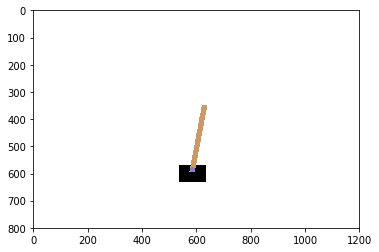

In [31]:
# frames = []
for episode_no in range(max_episodes):
    explore_rate = select_explore_rate(episode_no)
    learning_rate = select_learning_rate(episode_no)

    observation = environment.reset()

    start_state_value = bucketize_state_value(observation)
    previous_state_value = start_state_value

    img = plt.imshow(environment.render(mode='rgb_array')) # only call this once
# for _ in range(1000):

    for time_step in range(max_time_steps):
#         environment.render()
#         frames.append(environment.render(mode = 'rgb_array'))
        img.set_data(environment.render(mode='rgb_array')) # just update the data
        display.display(plt.gcf())
        display.clear_output()#wait=True)

#         environment.close()
    
        selected_action = select_action(previous_state_value, explore_rate)
        observation, reward_gain, completed, _ = environment.step(selected_action)
        state_value = bucketize_state_value(observation)
        best_q_value = np.amax(q_value_table[state_value])
        q_value_table[previous_state_value + (selected_action,)] += learning_rate * (
                reward_gain + discount * (best_q_value) - q_value_table[previous_state_value + (selected_action,)])

        print('Episode number : %d' % episode_no)
        print('Time step : %d' % time_step)
        print('Selection action : %d' % selected_action)
        print('Current state : %s' % str(state_value))
        print('Reward obtained : %f' % reward_gain)
        print('Best Q value : %f' % best_q_value)
        print('Learning rate : %f' % learning_rate)
        print('Explore rate : %f' % explore_rate)
        print('Streak number : %d' % no_streaks)

        if completed:
            print('Episode %d finished after %f time steps' % (episode_no, time_step))
            if time_step >= solved_time:
                no_streaks += 1
            else:
                no_streaks = 0
            break

        previous_state_value = state_value

    if no_streaks > streak_to_end:
        break



In [ ]:
display_frames_as_gif(frames)

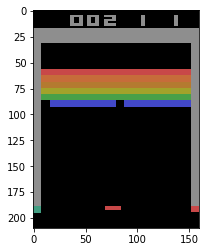

In [4]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(1000):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

In [2]:
!pip install gym[atari]

    100% |████████████████████████████████| 3.3MB 2.5MB/s ta 0:00:011
    100% |████████████████████████████████| 3.7MB 1.1MB/s ta 0:00:011
    100% |████████████████████████████████| 1.2MB 825kB/s ta 0:00:011
  Stored in directory: /Users/jaimealmeida/Library/Caches/pip/wheels/6c/00/7f/1dd736f380848720ad79a1a1de5272e0d3f79c15a42968fb58
Successfully built PyOpenGL
